In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline
sns.set_context(rc={'figure.figsize': (16,12)})

from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\conee\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\conee\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\conee\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df1 = pd.read_csv('df1.csv')

In [4]:
df1.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
index_orig,4176,11374,60917,38326,72995
parcelid,12658092,12659026,12659032,12658206,12659124
logerror,0.0507,-0.1661,-0.0471,-0.0182,0.0421
transactiondate,2016-01-21,2016-02-24,2016-07-29,2016-05-24,2016-09-02
year,2016,2016,2016,2016,2016
month,1,2,7,5,9
num_bath,2,2,3,2,2
num_bed,2,2,3,2,2
latitude,3.33393e+07,3.334e+07,3.33401e+07,3.33402e+07,3.33405e+07


In [5]:
df1.dtypes

Unnamed: 0                  int64
index_orig                  int64
parcelid                    int64
logerror                  float64
transactiondate            object
year                        int64
month                       int64
num_bath                  float64
num_bed                     int64
latitude                  float64
longitude                 float64
area_lot                  float64
city                        int64
county                    float64
zip                         int64
num_rooms                 float64
build_year                  int64
tax_assessed_structure    float64
tax_assessed_parcel       float64
assessmentyear              int64
tax_assessed_land         float64
tax_total                 float64
area_living                 int64
dtype: object

In [6]:
df1 = df1[['logerror','zip','num_bed','num_bath','area_living','area_lot', 'month','city','county','tax_total']]
df1.head()

,logerror,zip,num_bed,num_bath,area_living,area_lot,month,city,county,tax_total
0,0.0507,96207,2,2.0,1703,2080.0,1,3491,3101.0,5433.63
1,-0.1661,96207,2,2.0,865,1250.0,2,3491,3101.0,7949.83
2,-0.0471,96207,3,3.0,1500,1103.0,7,3491,3101.0,6174.19
3,-0.0182,96207,2,2.0,1422,8934.0,5,3491,3101.0,3036.02
4,0.0421,96207,2,2.0,902,4328.0,9,3491,3101.0,5934.02


In [7]:
from sklearn.model_selection import train_test_split
Z = df1.drop(['logerror'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Z, df1.logerror, test_size = 0.3, random_state=42)

#### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pred1 = lm.predict(Xtest)
pred1

array([ 0.00579867,  0.00420218,  0.02014428, ...,  0.0156311 ,
        0.00609682,  0.00503114])

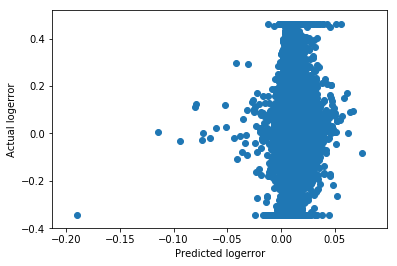

In [10]:
plt.scatter(pred1, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error as mae
MAE = round(mae(Ytest, pred1),4)
print('The Mean Absolute Error for Linear Regression is: %s' % MAE)

The Mean Absolute Error for Linear Regression is: 0.0618


### Decision trees

In [12]:
from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor(max_depth=2)
dt5 = DecisionTreeRegressor(max_depth=5)

fit1 = dt2.fit(Xtrain, Ytrain)
fit2 = dt5.fit(Xtrain, Ytrain)

In [13]:
pred1 = dt2.predict(Xtest)
pred2 = dt5.predict(Xtest)

In [14]:
pred1

array([ 0.00428407,  0.00428407,  0.01952046, ...,  0.02309516,
        0.00428407,  0.02309516])

In [15]:
pred2

array([-0.00139713,  0.00429332,  0.03050883, ...,  0.0229758 ,
        0.00429332,  0.0229758 ])

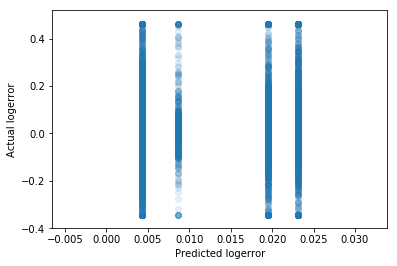

In [16]:
plt.scatter(pred1, Ytest, alpha=.1)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

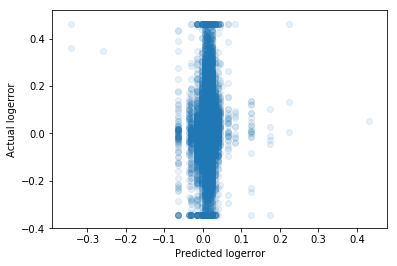

In [17]:
plt.scatter(pred2, Ytest, alpha=.1)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error as mae
MAE = round(mae(Ytest, pred1),4)
print('The Mean Absolute Error for Decision Tree Regression (depth = 2) is: %s' % MAE)

MAE = round(mae(Ytest, pred2),4)
print('The Mean Absolute Error for Decision Tree Regression (depth = 5) is: %s' % MAE)

The Mean Absolute Error for Decision Tree Regression (depth = 2) is: 0.0619
The Mean Absolute Error for Decision Tree Regression (depth = 5) is: 0.0622


### Decision Tree with AdaBoost

In [18]:
import numpy as np
rng = np.random.RandomState(1)

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(dt5, n_estimators=300, random_state=rng)

In [19]:
fit4 = regressor.fit(Xtrain, Ytrain)
pred4 = fit4.predict(Xtest)
pred4

array([ 0.03067099,  0.02580065,  0.03111526, ...,  0.06707217,
        0.04981777,  0.06707217])

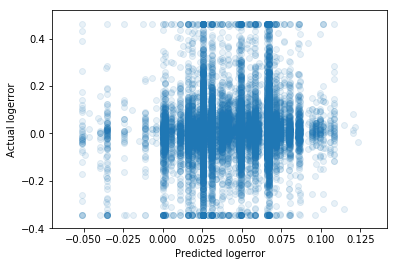

In [20]:
plt.scatter(pred4, Ytest, alpha=.1)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error as mae
MAE = round(mae(Ytest, pred4),4)
print('The Mean Absolute Error for Decision Tree Regression with Adaboost is: %s' % MAE)

The Mean Absolute Error for Decision Tree Regression with Adaboost is: 0.0738


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300)
rf.fit(Xtrain, Ytrain)
pred5 = rf.predict(Xtest)
pred5

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

array([-0.012328  ,  0.00375   ,  0.02044127, ...,  0.03316688,
       -0.010766  ,  0.03466443])

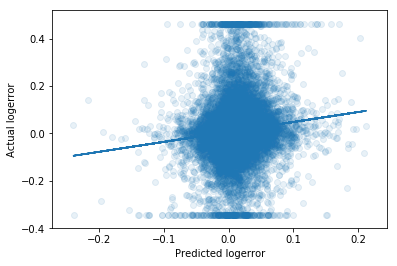

In [22]:
plt.scatter(pred5, Ytest, alpha=.1)
plt.plot(pred5, np.poly1d(np.polyfit(pred5, Ytest, 1))(pred5))
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error as mae
MAE = round(mae(Ytest, pred5),4)
print('The Mean Absolute Error for Random Forest Regression (9 variables) is: %s' % MAE)

The Mean Absolute Error for Random Forest Regression (9 variables) is: 0.0642


In [23]:
rf.feature_importances_

array([ 0.13541979,  0.04746021,  0.03737949,  0.19846132,  0.20094983,
        0.07857842,  0.0737584 ,  0.00798744,  0.22000511])

In [24]:
df1.dtypes

logerror       float64
zip              int64
num_bed          int64
num_bath       float64
area_living      int64
area_lot       float64
month            int64
city             int64
county         float64
tax_total      float64
dtype: object

In [25]:
rf.predict([[96207,3,3.0,1500,1103.0,7,12447,3101.0,2000.0]])

array([ 0.01005961])

In [26]:
df2 = df1[['logerror','area_living','area_lot','tax_total']]
df2.head()

,logerror,area_living,area_lot,tax_total
0,0.0507,1703,2080.0,5433.63
1,-0.1661,865,1250.0,7949.83
2,-0.0471,1500,1103.0,6174.19
3,-0.0182,1422,8934.0,3036.02
4,0.0421,902,4328.0,5934.02


In [27]:
from sklearn.model_selection import train_test_split
Z2 = df2.drop(['logerror'], axis=1)
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(Z2, df1.logerror, test_size = 0.3, random_state=42)

In [28]:
rf1 = RandomForestRegressor(n_estimators = 300, criterion='mae', random_state = 911)
rf1.fit(Xtrain2,Ytrain2)
pred6 = rf1.predict(Xtest2)
pred6

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=911, verbose=0, warm_start=False)

array([-0.00900617, -0.00855489,  0.01424133, ...,  0.04020411,
       -0.05333642, -0.0446828 ])

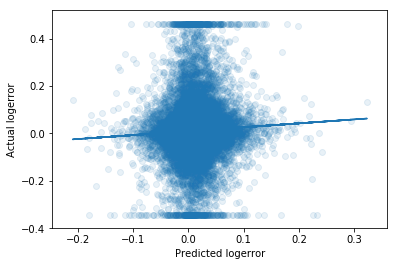

In [29]:
plt.scatter(pred6, Ytest2, alpha=.1)
plt.plot(pred6, np.poly1d(np.polyfit(pred6, Ytest2, 1))(pred6))
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error as mae
MAE = round(mae(Ytest2, pred6),4)
print('The Mean Absolute Error for Random Forest Regression (3 variables) is: %s' % MAE)

The Mean Absolute Error for Random Forest Regression (3 variables) is: 0.0672


In order from lowest to highest Mean Absolute Error, the errors and methods are:
* .0618 - Linear Regression
* .0619 - Decision Trees
* .0622 - Decision Trees
* .0642 - Random Forest (9 variables)
* .0672 - Random Forest (3 variables)
* .0738 - Decision Trees with Adaboost

This is actually quite counter intuitive, as looking at the scatterplots, it would have appeared that the Random Forest regressions would have had the lowest error and the Linear Model would have had the highest.